In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\hriti\Downloads\housing-rent-prediction-master\housing-rent-prediction-master\_All_Cities_Cleaned.csv')

In [3]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [4]:
print("There are {} duplicate values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

There are 85398 duplicate values.


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
8,OWNER,2.0,BHK,Apartment,Shahibuag,13000.0,1126.0,Semi-Furnished,2.0,Ahmedabad
12,AGENT,3.0,BHK,Apartment,Shilaj,20000.0,1440.0,Semi-Furnished,3.0,Ahmedabad
14,AGENT,2.0,BHK,Apartment,Jodhpur Village,25000.0,1250.0,Furnished,1.0,Ahmedabad
18,AGENT,2.0,BHK,Apartment,Chandkheda,12500.0,1044.0,Unfurnished,2.0,Ahmedabad
19,AGENT,2.0,BHK,Apartment,Bodakdev,12000.0,810.0,Unfurnished,2.0,Ahmedabad
20,AGENT,3.0,BHK,Apartment,Bopal,38000.0,1985.0,Furnished,3.0,Ahmedabad
21,AGENT,2.0,BHK,Apartment,Prahlad Nagar,14000.0,1256.0,Unfurnished,2.0,Ahmedabad
22,AGENT,4.0,BHK,Apartment,Satellite,110000.0,3375.0,Furnished,4.0,Ahmedabad


In [5]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [6]:
print("There are {} duplicate values.".format(df.duplicated().sum()))
df.head()

There are 0 duplicate values.


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [7]:
df=df[['bedroom','locality','price','area','furnish_type','bathroom','city']]
df.head(10)

,bedroom,locality,price,area,furnish_type,bathroom,city
0,2.0,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,1.0,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,3.0,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,2.0,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,2.0,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad
5,1.0,Vejalpur,8500.0,570.0,Unfurnished,1.0,Ahmedabad
6,1.0,Jivraj Park,6000.0,180.0,Semi-Furnished,1.0,Ahmedabad
7,2.0,Nikol,12000.0,1200.0,Semi-Furnished,2.0,Ahmedabad
8,2.0,Shahibuag,13000.0,1126.0,Semi-Furnished,2.0,Ahmedabad
9,4.0,Maninagar,38500.0,3500.0,Furnished,4.0,Ahmedabad


In [8]:
df['bedroom']=df['bedroom'].astype('int32')
df['bathroom']=df['bathroom'].astype('int32')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107613 entries, 0 to 107612
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   bedroom       107613 non-null  int32  
 1   locality      107613 non-null  object 
 2   price         107613 non-null  float64
 3   area          107613 non-null  float64
 4   furnish_type  107613 non-null  object 
 5   bathroom      107613 non-null  int32  
 6   city          107613 non-null  object 
dtypes: float64(2), int32(2), object(3)
memory usage: 4.9+ MB


In [10]:
df = df[df["bedroom"] != 0].reset_index(drop=True)

# drop NoOfBedroom = 0
df= df[df["price"] != 0].reset_index(drop=True)

# drop NoOfBathroom = 0
df = df[df["area"] != 0].reset_index(drop=True)

# drop NoOfParking = 0
df = df[df["bathroom"] != 0].reset_index(drop=True)
df.head(10)

,bedroom,locality,price,area,furnish_type,bathroom,city
0,2,Bodakdev,20000.0,1450.0,Furnished,2,Ahmedabad
1,1,CG Road,7350.0,210.0,Semi-Furnished,1,Ahmedabad
2,3,Jodhpur,22000.0,1900.0,Unfurnished,3,Ahmedabad
3,2,Sanand,13000.0,1285.0,Semi-Furnished,2,Ahmedabad
4,2,Navrangpura,18000.0,1600.0,Furnished,2,Ahmedabad
5,1,Vejalpur,8500.0,570.0,Unfurnished,1,Ahmedabad
6,1,Jivraj Park,6000.0,180.0,Semi-Furnished,1,Ahmedabad
7,2,Nikol,12000.0,1200.0,Semi-Furnished,2,Ahmedabad
8,2,Shahibuag,13000.0,1126.0,Semi-Furnished,2,Ahmedabad
9,4,Maninagar,38500.0,3500.0,Furnished,4,Ahmedabad


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107613 entries, 0 to 107612
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   bedroom       107613 non-null  int32  
 1   locality      107613 non-null  object 
 2   price         107613 non-null  float64
 3   area          107613 non-null  float64
 4   furnish_type  107613 non-null  object 
 5   bathroom      107613 non-null  int32  
 6   city          107613 non-null  object 
dtypes: float64(2), int32(2), object(3)
memory usage: 4.9+ MB


In [12]:
with pd.option_context('float_format', '{:f}'.format): print(df["price"].describe())

count    107613.000000
mean      47062.173176
std      103286.677747
min        1200.000000
25%       13000.000000
50%       20100.000000
75%       37000.000000
max     5885000.000000
Name: price, dtype: float64


c:\Users\hriti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


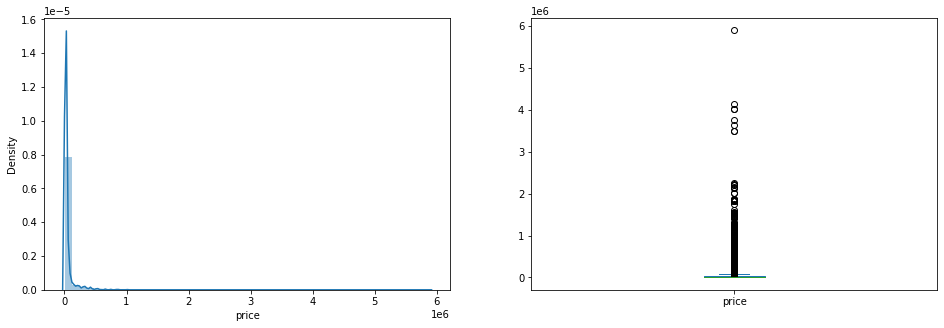

In [13]:
plt.subplot(121)
sns.distplot(df["price"]);

plt.subplot(122)
df["price"].plot.box(figsize=(16,5))

plt.show()

In [14]:
df = df[df["price"] <= 150000].reset_index(drop=True)

print("Data type is {0} \n\nShape of dataframe is {1}\n".format(type(df), df.shape))

Data type is <class 'pandas.core.frame.DataFrame'> 

Shape of dataframe is (101205, 7)



In [15]:
with pd.option_context('float_format', '{:f}'.format): print(df["price"].describe())

count   101205.000000
mean     27129.001947
std      23741.228628
min       1200.000000
25%      12500.000000
50%      20000.000000
75%      32000.000000
max     150000.000000
Name: price, dtype: float64


c:\Users\hriti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


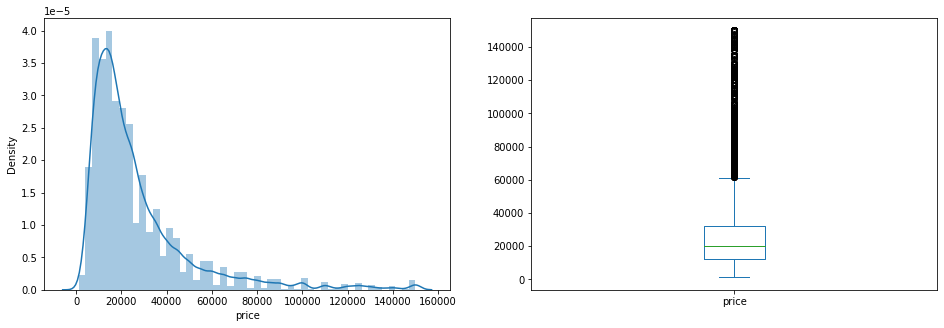

In [16]:
plt.subplot(121)
sns.distplot(df["price"]);

plt.subplot(122)
df["price"].plot.box(figsize=(16,5))
plt.savefig("distribution.png", bbox_inches="tight")

plt.show()

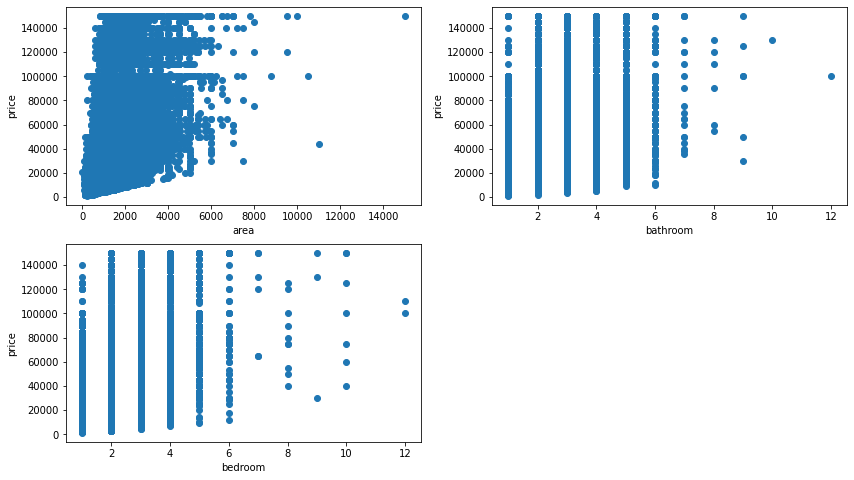

In [17]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=df["area"], y=df["price"])
plt.xlabel("area")
plt.ylabel("price")

plt.subplot(2, 2, 2)
plt.scatter(x=df["bathroom"], y=df["price"])
plt.xlabel("bathroom")
plt.ylabel("price")

plt.subplot(2, 2, 3)
plt.scatter(x=df["bedroom"], y=df["price"])
plt.xlabel("bedroom")
plt.ylabel("price")

plt.savefig("scatterplots.png", bbox_inches="tight")
plt.show()

In [18]:
corr = df[["area", "bathroom", "bedroom", "price"]].corr()
corr

,area,bathroom,bedroom,price
area,1.000000,0.775817,0.798272,0.563660
bathroom,0.775817,1.000000,0.831934,0.550141
bedroom,0.798272,0.831934,1.000000,0.516541
price,0.563660,0.550141,0.516541,1.000000


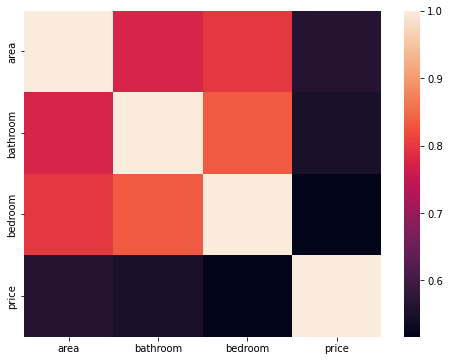

In [19]:
plt.subplots(figsize=(8,6))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

fig.get_figure().savefig("corr_heatmap.png", bbox_inches="tight") 

In [20]:
# : Built Up Size has the highest correlation (positive) with Rental Per Month as expected. Surprisingly, No of Bathroom has higher correlation with Rental Per Month compared to No of Bedroom
df_df = pd.get_dummies(df)

df_df.head()


,bedroom,price,area,bathroom,locality_1 Sector Number 3 Road,locality_10 Sector Number 3 Road,locality_10 Sector Number 6 Road,locality_100 Feet Road,locality_11 Sector Number 6 Road,locality_14TH ROAD,...,furnish_type_Semi-Furnished,furnish_type_Unfurnished,city_Ahmedabad,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune
0,2,20000.0,1450.0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,7350.0,210.0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,3,22000.0,1900.0,3,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,2,13000.0,1285.0,2,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,2,18000.0,1600.0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
print(df_df.shape, "\n")
df_df.info()

(101205, 4116) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101205 entries, 0 to 101204
Columns: 4116 entries, bedroom to city_Pune
dtypes: float64(2), int32(2), uint8(4112)
memory usage: 399.2 MB


In [22]:
X = df_df.drop(columns=["price"])
Y = df_df["price"]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
print("Liner Regression R-squared: {}".format(regressor.score(X_test, y_test)))

Liner Regression R-squared: -1322942027263.5862


In [27]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Liner Regression RMSE: {}".format(lin_rmse))

Liner Regression RMSE: 27415674760.273262


In [28]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print("Liner Regression MAE: {}".format(lin_mae))

Liner Regression MAE: 1196662622.8830485


In [30]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [31]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [32]:
y_pred = rf.predict(X_test)

In [33]:
print("Random Forest R-squared: {}".format(rf.score(X_test, y_test)))

Random Forest R-squared: 0.7940615620994029


In [34]:
from sklearn.metrics import r2_score
forest_r2 = r2_score(y_test, y_pred)

print("Random Forest R-squared: {}".format(forest_r2))

Random Forest R-squared: 0.7940615620994029


In [35]:
from sklearn.metrics import mean_squared_error

forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))

Random Forest Regression RMSE: 10816.761143888465


In [36]:
from sklearn.metrics import mean_absolute_error

forest_mae = mean_absolute_error(y_pred, y_test)
print("Random Forest Regression MAE: {}".format(forest_mae))

Random Forest Regression MAE: 5841.72545464411
